### Modeling Enhanced Features with Random Forest
#### Data Preparation
- The enhanced dataset was loaded and split into training and testing sets:
- Features (X): Includes engineered and original features (e.g., bmi, bmi_squared, bmi_bp).
- Target (y): The disease progression measure.
- Training set: 353 samples (80%)
- Testing set: 89 samples (20%)

In [1]:
import pandas as pd
data = pd.read_csv("../data/processed/diabetes_enhanced.csv")
X = data.drop("target", axis=1)
y = data["target"]


In [2]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s3           442 non-null    float64
 6   s4           442 non-null    float64
 7   s5           442 non-null    float64
 8   s6           442 non-null    float64
 9   bmi_squared  442 non-null    float64
 10  bmi_bp       442 non-null    float64
 11  target       442 non-null    float64
dtypes: float64(12)
memory usage: 41.6 KB


,age,sex,bmi,bp,s1,s3,s4,s5,s6,bmi_squared,bmi_bp,target
count,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-8.037814e-18,2.290777e-16,-0.003813,-2.411344e-17,-0.004450,-0.011208,-0.002405,-0.000436,-0.002734,0.976511,0.396393,152.133484
std,1.001133e+00,1.001133e+00,0.989298,1.001133e+00,0.988524,0.965711,0.992894,0.999919,0.988053,1.294963,1.058330,77.093005
min,-2.254290e+00,-9.385367e-01,-1.897929,-2.363050e+00,-2.665411,-2.150883,-1.606102,-2.651040,-2.624256,0.000030,-2.688598,25.000000
25%,-7.841722e-01,-9.385367e-01,-0.719625,-7.706500e-01,-0.720020,-0.738296,-0.830301,-0.698949,-0.697549,0.111830,-0.109055,87.000000
50%,1.131724e-01,-9.385367e-01,-0.153132,-1.192138e-01,-0.090841,-0.138431,-0.054499,-0.040937,-0.022657,0.501174,0.152168,140.500000
75%,8.005001e-01,1.065488e+00,0.656952,7.493678e-01,0.596193,0.616239,0.721302,0.681851,0.586922,1.422217,0.743143,211.500000
max,2.327895e+00,1.065488e+00,2.721817,2.776058e+00,2.570512,2.648042,3.048707,2.753049,2.513630,7.408289,5.498629,346.000000


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (353, 11), X_test shape: (89, 11)
y_train shape: (353,), y_test shape: (89,)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")


Random Forest Regressor - MAE: 44.38, MSE: 3004.35, R²: 0.43


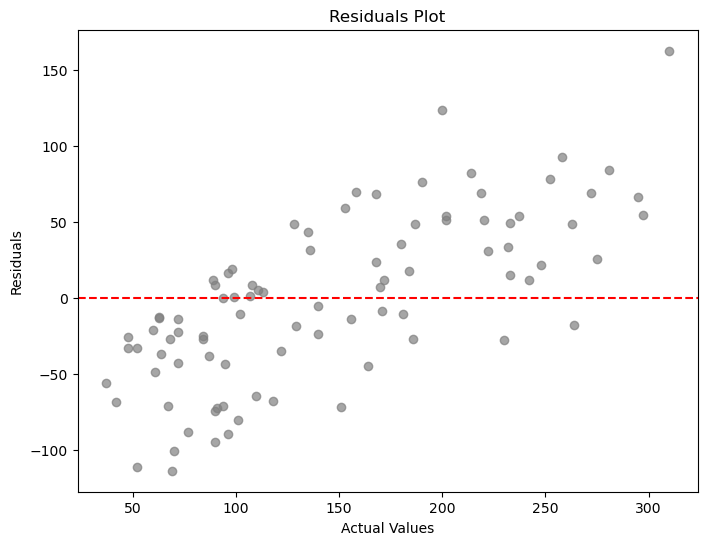

In [5]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='gray')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()


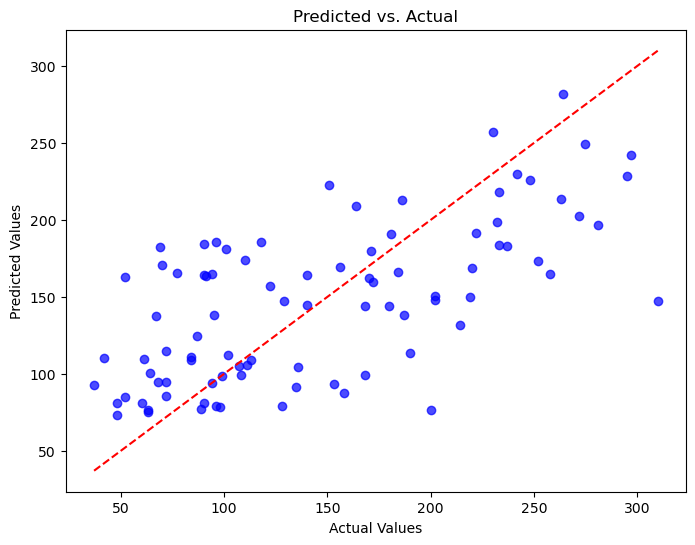

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


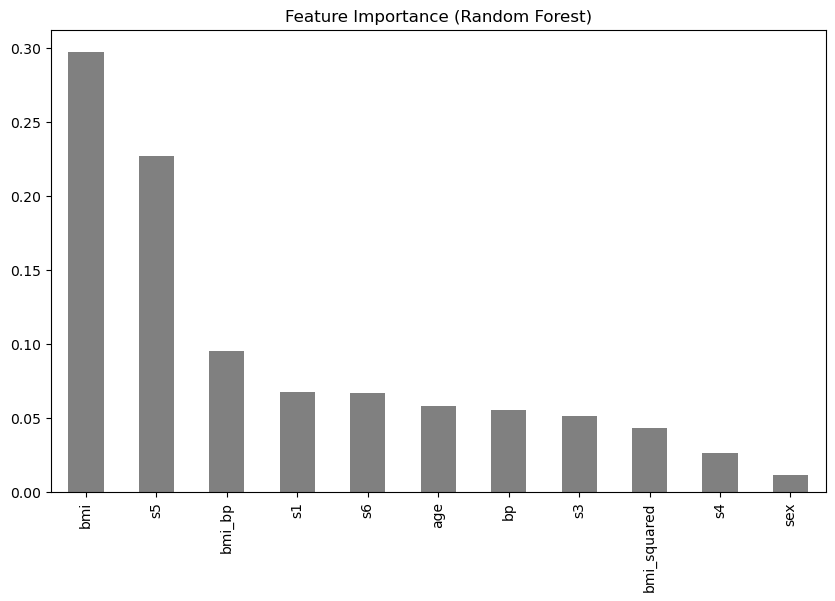

In [8]:
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6), color="gray")
plt.title("Feature Importance (Random Forest)")
plt.show()


### Gradient Boosting Regressor
- Gradient Boosting builds models sequentially, where each model attempts to correct the errors of the previous one. It’s a powerful method for handling complex relationships in data.
- n_estimators=100: Number of boosting stages.
- learning_rate=0.1: Controls the contribution of each tree to the final model.
- max_depth=3: Limits the depth of each tree to prevent overfitting.
- random_state=42: Ensures reproducibility.

#### Performance Metrics
- Mean Absolute Error (MAE): 42.84
- Mean Squared Error (MSE): 2886.36
- R² Score: 0.46

#### Observations:
Gradient Boosting achieved slightly better performance than the baseline Random Forest model, with improvements in both MAE and R².
The iterative error correction process of Gradient Boosting contributed to its superior performance.


In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)


mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor - MAE: {mae_gb:.2f}, MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")


Gradient Boosting Regressor - MAE: 42.84, MSE: 2886.36, R²: 0.46


### Random Forest Optimization with GridSearchCV
- GridSearchCV was used to tune the hyperparameters of the Random Forest model, improving its performance through an exhaustive search over a specified parameter grid.
- n_estimators: Number of trees in the forest ([50, 100, 200]).
- max_depth: Maximum depth of the trees ([None, 10, 20]).
- min_samples_split: Minimum number of samples required to split a node ([2, 5, 10]).
- Best Parameters: After performing the search, the best combination was found to be: max_depth: 10, min_samples_split: 5, n_estimators: 200
- With a cross-validated R² score of 0.435.
- Performance Metrics: Using the optimized parameters, the model achieved:
- MAE: 43.78, MSE: 2975.17, R²: 0.44

#### Observations
- Gradient Boosting outperformed both the baseline and optimized Random Forest models, achieving the lowest error and highest R² score.
- Hyperparameter tuning improved the Random Forest model, but it couldn’t match the performance of Gradient Boosting.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R² score: {grid_search.best_score_}")

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)


mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest - MAE: {mae_best_rf:.2f}, MSE: {mse_best_rf:.2f}, R²: {r2_best_rf:.2f}")

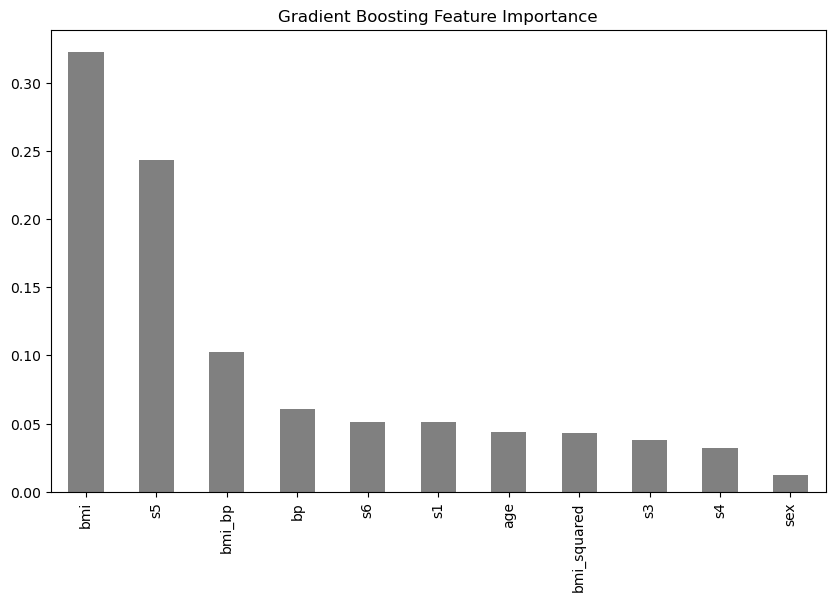

In [11]:
gb_importances = pd.Series(gb_model.feature_importances_, index=X.columns)
gb_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6), color="gray")
plt.title("Gradient Boosting Feature Importance")
plt.show()
